# Lecture 19: ML for color images

Plan:
1. Set up imports
2. Load CIFAR-10 images using pickle
3. Write a function to view an image
4. train/test split
5. Model fitting
6. Accuracy evalution
7. Activity: make a plot of given hyperparameter effect on accuracy


# Lecture 20: Intro to Nerual Netwroks

Plan:
1. Set up imports
2. Load CIFAR-10 images using pickle
3. Write a function to view an image
4. train/test split
5. Model fitting
6. Accuracy evalution
7. Investigate how hidden layer archetecture affects accuracy
8. Activity: Investigate how activation function affects accuracy


In [1]:
# set up imports
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# load the CIFAR-10 data
with open('cifar_data', 'rb') as file:
    cifar_data = pickle.load(file, encoding='latin1')

type(cifar_data)

dict

In [3]:
# gt image data and label data
image_data = cifar_data['data']
label_data = cifar_data['labels']

len(label_data)

10000

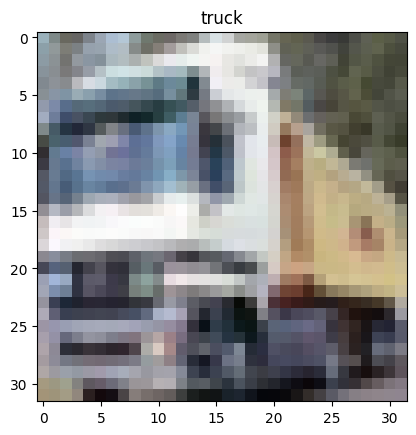

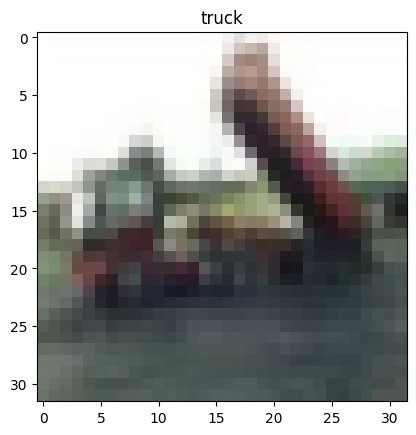

In [4]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# display first image
#image = image_data[0]
#label = label_data[0]

def show_image(image, label):

    # reshape image data into (3 x 32 x 32)
    img = image.reshape(3, 32, 32)

    #reorder the dimensions for matplotlib
    img = img.transpose(1, 2, 0)

    plt.imshow(img)
    plt.title(label_names[label])
    plt.show()

#print(label_data[0])
show_image(image_data[1], label_data[1])
show_image(image_data[2], label_data[2])

In [5]:
# do train/test split
X_train, X_test, y_train, y_test = train_test_split(image_data, label_data, random_state=42)

X_train.shape

(7500, 3072)

In [6]:
#define our model
clf = RandomForestClassifier(random_state=42)

#Train the model

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# make predictions
y_pred = clf.predict(X_test)

#determine the accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.408

The predicted label was truck and the true label is automobile


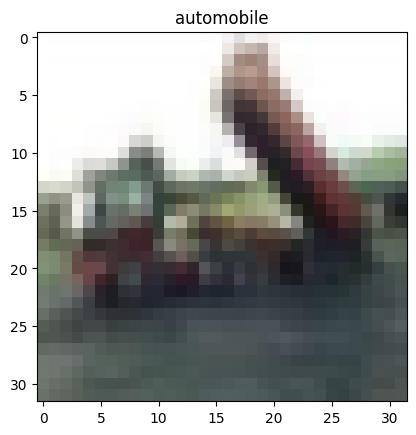

The predicted label was truck and the true label is ship


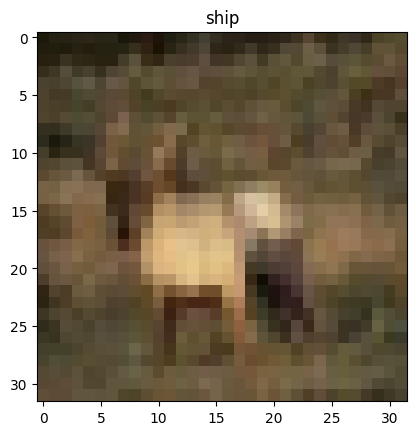

The predicted label was automobile and the true label is dog


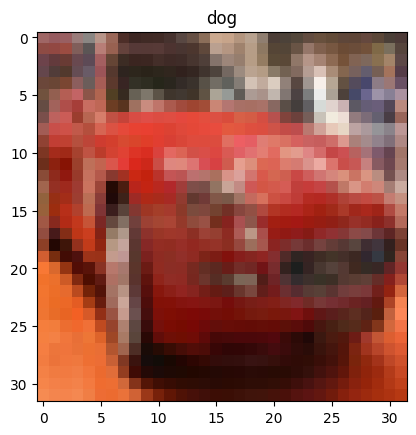

The predicted label was horse and the true label is airplane


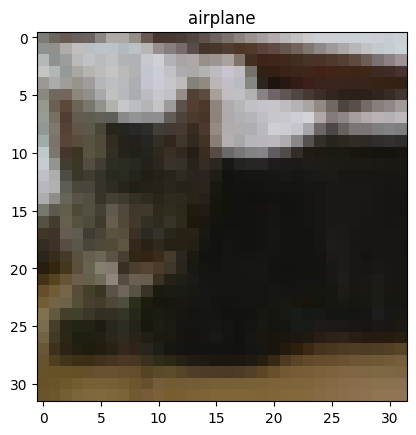

The predicted label was dog and the true label is horse


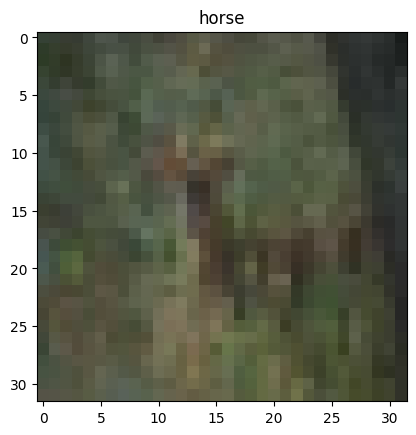

The predicted label was horse and the true label is cat


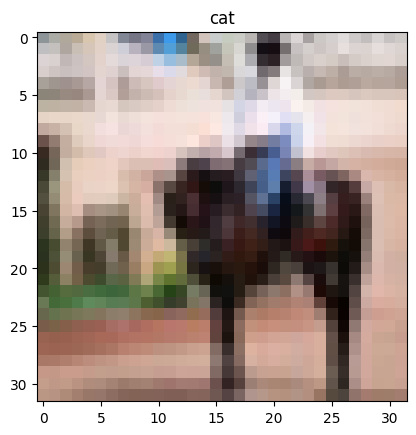

The predicted label was airplane and the true label is deer


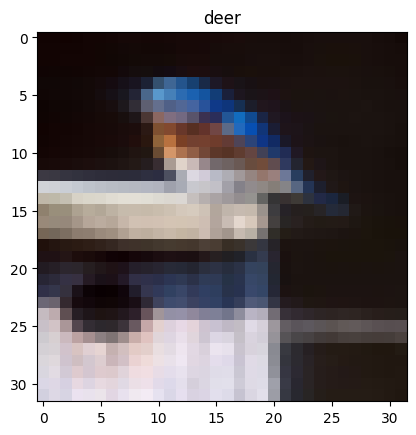

The predicted label was airplane and the true label is dog


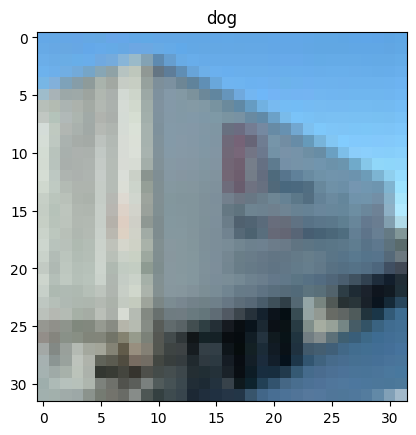

The predicted label was truck and the true label is horse


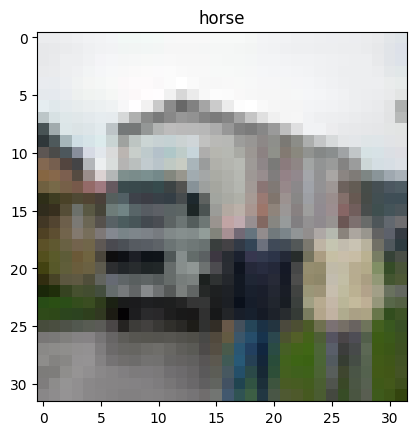

In [8]:
#display first 10 incorrect predictions
num_incorrect = 0

#loop over labels and images
for true_label, pred_label, image in zip(y_test, y_pred, image_data):
    #check for incorrect label predictions
    if true_label != pred_label:
        num_incorrect = num_incorrect + 1

        if num_incorrect < 10:
            print(f'The predicted label was {label_names[pred_label]} and the true label is {label_names[true_label]}')
            show_image(image, true_label)


In [ ]:
# make a line plot of n_estimaters vs accuracy

n_estimator_values = [1, 5, 25, 100, 200]
accuracy_score_values = []

for n_estimator_val in n_estimator_values:
    print(n_estimator_val)
    
    clf = RandomForestClassifier(random_state=42, n_estimators=n_estimator_val)

    #train the model
    clf.fit(X_train, y_train)

    #get the predictions
    y_pred = clf.predict(X_test)

    #get the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    #add accuracy to list
    accuracy_score_values.append(accuracy)

accuracy_score_values

1


5
25
100
200


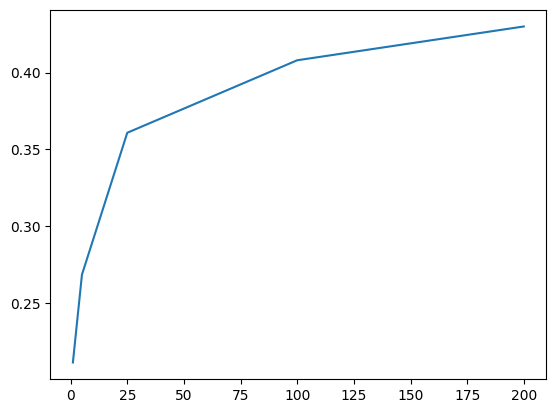

In [ ]:
#plot the data
plt.plot(n_estimator_values, accuracy_score_values)